In [82]:
import chess.pgn
import collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pgn = open("caissabase.pgn")

In [3]:
kill_moves = []    # store killing moves (containing 'x')
death_squares = [] # store square positions where kills occured

# parse 500 games
for i in range(0, 500):
    game = chess.pgn.read_game(pgn)
    board = game.board()
    # find all killing moves in this game
    for move in game.mainline_moves(): 
        if 'x' in board.san(move):
            kill_moves.append(board.san(move))
        board.push(move)

In [78]:
for elem in kill_moves:
    x_index = elem.index('x') # find index for 'x'
    death_squares.append(elem[x_index+1] + elem[x_index+2]) # append 2 subsequent chars

dic = collections.Counter(death_squares)
dic = collections.OrderedDict(sorted(dic.items()))
dic

OrderedDict([('a1', 598),
             ('a2', 1222),
             ('a3', 1586),
             ('a4', 2522),
             ('a5', 2496),
             ('a6', 2262),
             ('a7', 1456),
             ('a8', 832),
             ('b1', 546),
             ('b2', 2756),
             ('b3', 3770),
             ('b4', 5434),
             ('b5', 5278),
             ('b6', 2886),
             ('b7', 2496),
             ('b8', 650),
             ('c1', 1924),
             ('c2', 2080),
             ('c3', 6552),
             ('c4', 8086),
             ('c5', 8242),
             ('c6', 6448),
             ('c7', 1638),
             ('c8', 2054),
             ('d1', 2132),
             ('d2', 2782),
             ('d3', 4472),
             ('d4', 16432),
             ('d5', 18044),
             ('d6', 5928),
             ('d7', 3458),
             ('d8', 2808),
             ('e1', 1586),
             ('e2', 3016),
             ('e3', 4342),
             ('e4', 10738),
             ('e5', 12506),
 

In [79]:
data = np.array(list(dic.values()) ).reshape(8,8) # transform to 2D
data = data.transpose() # transpose (swap rows with columns)
data = np.flipud(data)  # flip vertically to match chessboard layout
data

array([[  832,   650,  2054,  2808,  1560,  1092,   156,   364],
       [ 1456,  2496,  1638,  3458,  3354,  2938,  2470,   884],
       [ 2262,  2886,  6448,  5928,  4914,  7748,  3458,  2132],
       [ 2496,  5278,  8242, 18044, 12506,  6942,  4836,  2314],
       [ 2522,  5434,  8086, 16432, 10738,  6006,  4030,  2210],
       [ 1586,  3770,  6552,  4472,  4342,  5746,  3536,  1612],
       [ 1222,  2756,  2080,  2782,  3016,  2132,  2418,   780],
       [  598,   546,  1924,  2132,  1586,  1352,   312,   494]])

In [80]:
df = pd.DataFrame(data=data, 
                  index=["8", "7", "6", "5", "4", "3", "2", "1"], 
                  columns=["a", "b", "c", "d", "e", "f", "g", "h"])
df

,a,b,c,d,e,f,g,h
8,832,650,2054,2808,1560,1092,156,364
7,1456,2496,1638,3458,3354,2938,2470,884
6,2262,2886,6448,5928,4914,7748,3458,2132
5,2496,5278,8242,18044,12506,6942,4836,2314
4,2522,5434,8086,16432,10738,6006,4030,2210
3,1586,3770,6552,4472,4342,5746,3536,1612
2,1222,2756,2080,2782,3016,2132,2418,780
1,598,546,1924,2132,1586,1352,312,494


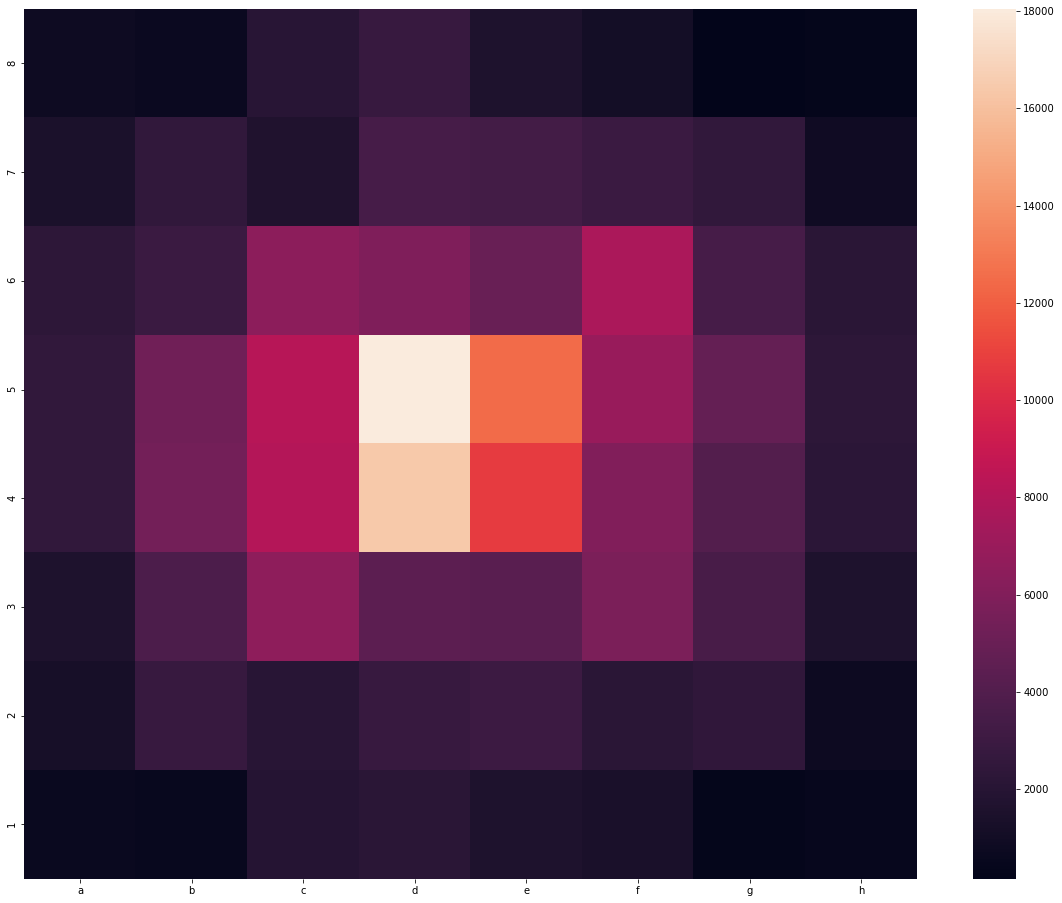

In [86]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(df, linewidths=0)


In [6]:
wgames_offsets = []
bgames_offsets = []
wgames = []         # stores games won by whites 
bgames = []         # stores games won by blacks

# skim through headers based on some condition
# without parsing entire games
for i in range(0,100):
    offset = pgn.tell()
    headers = chess.pgn.read_headers(pgn)
    
    if headers is None:
        break

    if headers["Result"][0] == '1': # white win
        wgames_offsets.append(offset)
        
    if headers["Result"][0] == '0': # black win
        bgames_offsets.append(offset)

# parse white games
for offset in wgames_offsets:
    pgn.seek(offset)
    wgames.append(chess.pgn.read_game(pgn))

# parse black games
for offset in bgames_offsets:
    pgn.seek(offset)
    bgames.append(chess.pgn.read_game(pgn))

In [49]:
kill_moves = [] # stores all killing moves

for g in range(len(wgames)):
    board = wgames[g].board()
    
    for move in wgames[g].mainline_moves():
        if 'x' in board.san(move):
            kill_moves.append(board.san(move))
        board.push(move)

kill_moves


['fxg6',
 'hxg6',
 'Bxd4',
 'cxd4',
 'Nxf3+',
 'Bxf3',
 'cxd5',
 'exd5',
 'fxe5',
 'Rxg5',
 'Nxd4',
 'Bxd4',
 'cxd4',
 'Qxd4',
 'exf5',
 'gxf5',
 'Nxf3+',
 'Bxf3',
 'Bxg7',
 'Qxg7',
 'Nxe5',
 'Qxb2',
 'Nxb2',
 'Nxf4',
 'Rxg4',
 'hxg4',
 'Nxg4',
 'axb5',
 'axb5',
 'Nxh6',
 'Kxh6',
 'Rxf6+',
 'Rxf6',
 'gxf6',
 'Bxb5',
 'Kxf6',
 'Rxb7',
 'Bxf3',
 'Bxh7',
 'Nxg3',
 'hxg3',
 'bxc5',
 'dxc5',
 'dxe6',
 'Bxe6',
 'gxf5',
 'Bxf5',
 'Bxf5',
 'Qxf5',
 'Nxb4',
 'cxb4',
 'Qxb4',
 'Rxf3',
 'gxf3',
 'fxg4',
 'Qxg4+',
 'Bxe7',
 'Qxe7',
 'cxd5',
 'exd5',
 'dxe4',
 'Nxe4',
 'Nxe4',
 'Bxe4',
 'Bxd5',
 'Rxd5',
 'Rxd5',
 'Rxd5',
 'cxd5',
 'Rxd5',
 'Rxd5',
 'Qxd5',
 'cxd5',
 'cxd4',
 'dxe6',
 'Bxe6',
 'Qxd4',
 'Bxd2+',
 'Nbxd2',
 'Qxb2',
 'Nxf3+',
 'Nxf3',
 'Qxe2',
 'Nxe2',
 'Bxa4',
 'Rxb7',
 'hxg4',
 'hxg4',
 'Nxg4+',
 'Rxg4',
 'Bxf5',
 'Rxg5+',
 'Rxa6',
 'Rxa6',
 'Bxa6',
 'Rxa3',
 'Nxd4',
 'Bxd4',
 'Bxd7+',
 'Qxd7',
 'axb5',
 'axb5',
 'Rxa8',
 'Rxa8',
 'fxg6',
 'hxg6',
 'Qxd7',
 'Nxd7',
 'dxe5',
 'Nxe5',


In [20]:
print(wgames[0])

[Event "TCh-RUS w Rapid 2018"]
[Site "Sochi RUS"]
[Date "2018.10.08"]
[Round "1.4"]
[White "Kovanova, B"]
[Black "Shafigullina, Zarina"]
[Result "1-0"]
[BlackElo "2150"]
[BlackFideId "24174220"]
[BlackTeam "Ladya (g. Kazan, Respublika Tatarstan"]
[BlackTitle "WFM"]
[ECO "A05"]
[EventDate "2018.10.08"]
[Opening "Reti opening"]
[WhiteElo "2350"]
[WhiteFideId "4164083"]
[WhiteTeam "Yugra (KhMAO-Yugra)"]
[WhiteTitle "WGM"]

1. Nf3 Nf6 2. g3 b6 3. Bg2 Bb7 4. O-O c5 5. d3 g6 6. e4 d6 7. c4 Bg7 8. Nc3 O-O 9. h3 Qc8 10. Be3 Nbd7 11. Qd2 Rd8 12. Rac1 Ne5 13. Nh4 Nc6 14. f4 Nd4 15. f5 Nd7 16. Bh6 Ne5 17. Rcd1 f6 18. fxg6 hxg6 19. Be3 e6 20. Ne2 g5 21. Bxd4 cxd4 22. Nf3 Nxf3+ 23. Bxf3 Qc5 24. Bg4 Qe5 25. b4 d5 26. cxd5 exd5 27. Rf5 Qe7 28. e5 fxe5 29. Rxg5 e4 30. Nxd4 e3 31. Be6+ Kh7 32. Rh5+ Kg6 33. Qe2 Bxd4 34. Qg4+ Kf6 35. Rh6+ Ke5 36. Qf4# 1-0
